## 練習時間

請觀看李宏毅教授以神奇寶貝進化 CP 值預測的範例，解說何謂機器學習與過擬合。並回答以下問題

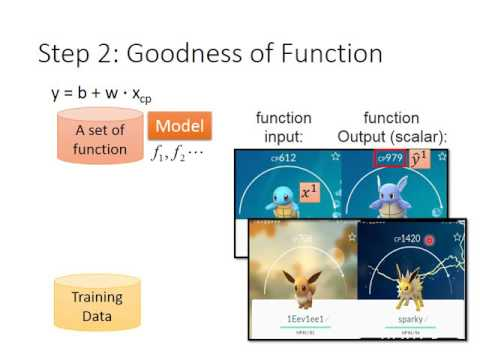

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("fegAeph9UaA", width=720, height=480)

### 1. 模型的泛化能力 (generalization) 是指什麼？
> 是否對任何資料都能有好的預測表現，而不只是在training data 上表現好，卻在testing data上 loss值爆高 (overfitting)

### 2. 分類問題與回歸問題分別可用的目標函數有哪些？

> Loss Function

---

- 分類問題

> 交叉熵損失函數 softmax

> 合頁損失函數

> 指數損失函數

> 對比損失函數

> 資訊增益

> Square loss或Hinge loss

https://zhuanlan.zhihu.com/p/44722270

---

- 回歸問題

> MSE : 均方誤差（ L2 損失函數 ）

> MAE : 平均絕對值誤差（ L1 損失函數 ）

> Huber 損失函數（ 平滑的平均絕對誤差 ）

> Log-Cosh 損失函數

> 分位數損失函數 -- 當我們更關注區間預測而不僅是點預測時，分位數損失函數就很有用。使用最小二乘回歸進行區間預測，基於的假設是殘差（y-y_hat）是獨立變量，且方差保持不變

https://buzzorange.com/techorange/2018/06/22/computer-learning-5-tips/

## 如果你是大木博士的話，就能透過 domain knowledge 刪掉很多不必要的參數，避免太複雜的模型 overfitting，讓testing data 的 error值爆掉．所以我加入懲罰項 Regularization 來避免這件事

---

## [Regularization]

### 比較平滑的function : y = b + wx, 權重(斜率)w小代表越平滑，對noise越不sensetive
### 那最平滑的function 是沒有權重的常數啊 水平線，那他什麼事都做不成，所以懲罰係數lambda太大的話，loss值當然又飆升

所以選一個最適的 lambda 讓 testing data 的 loss (error) 值最小（由大到小，最後再變大 的那個轉折點）






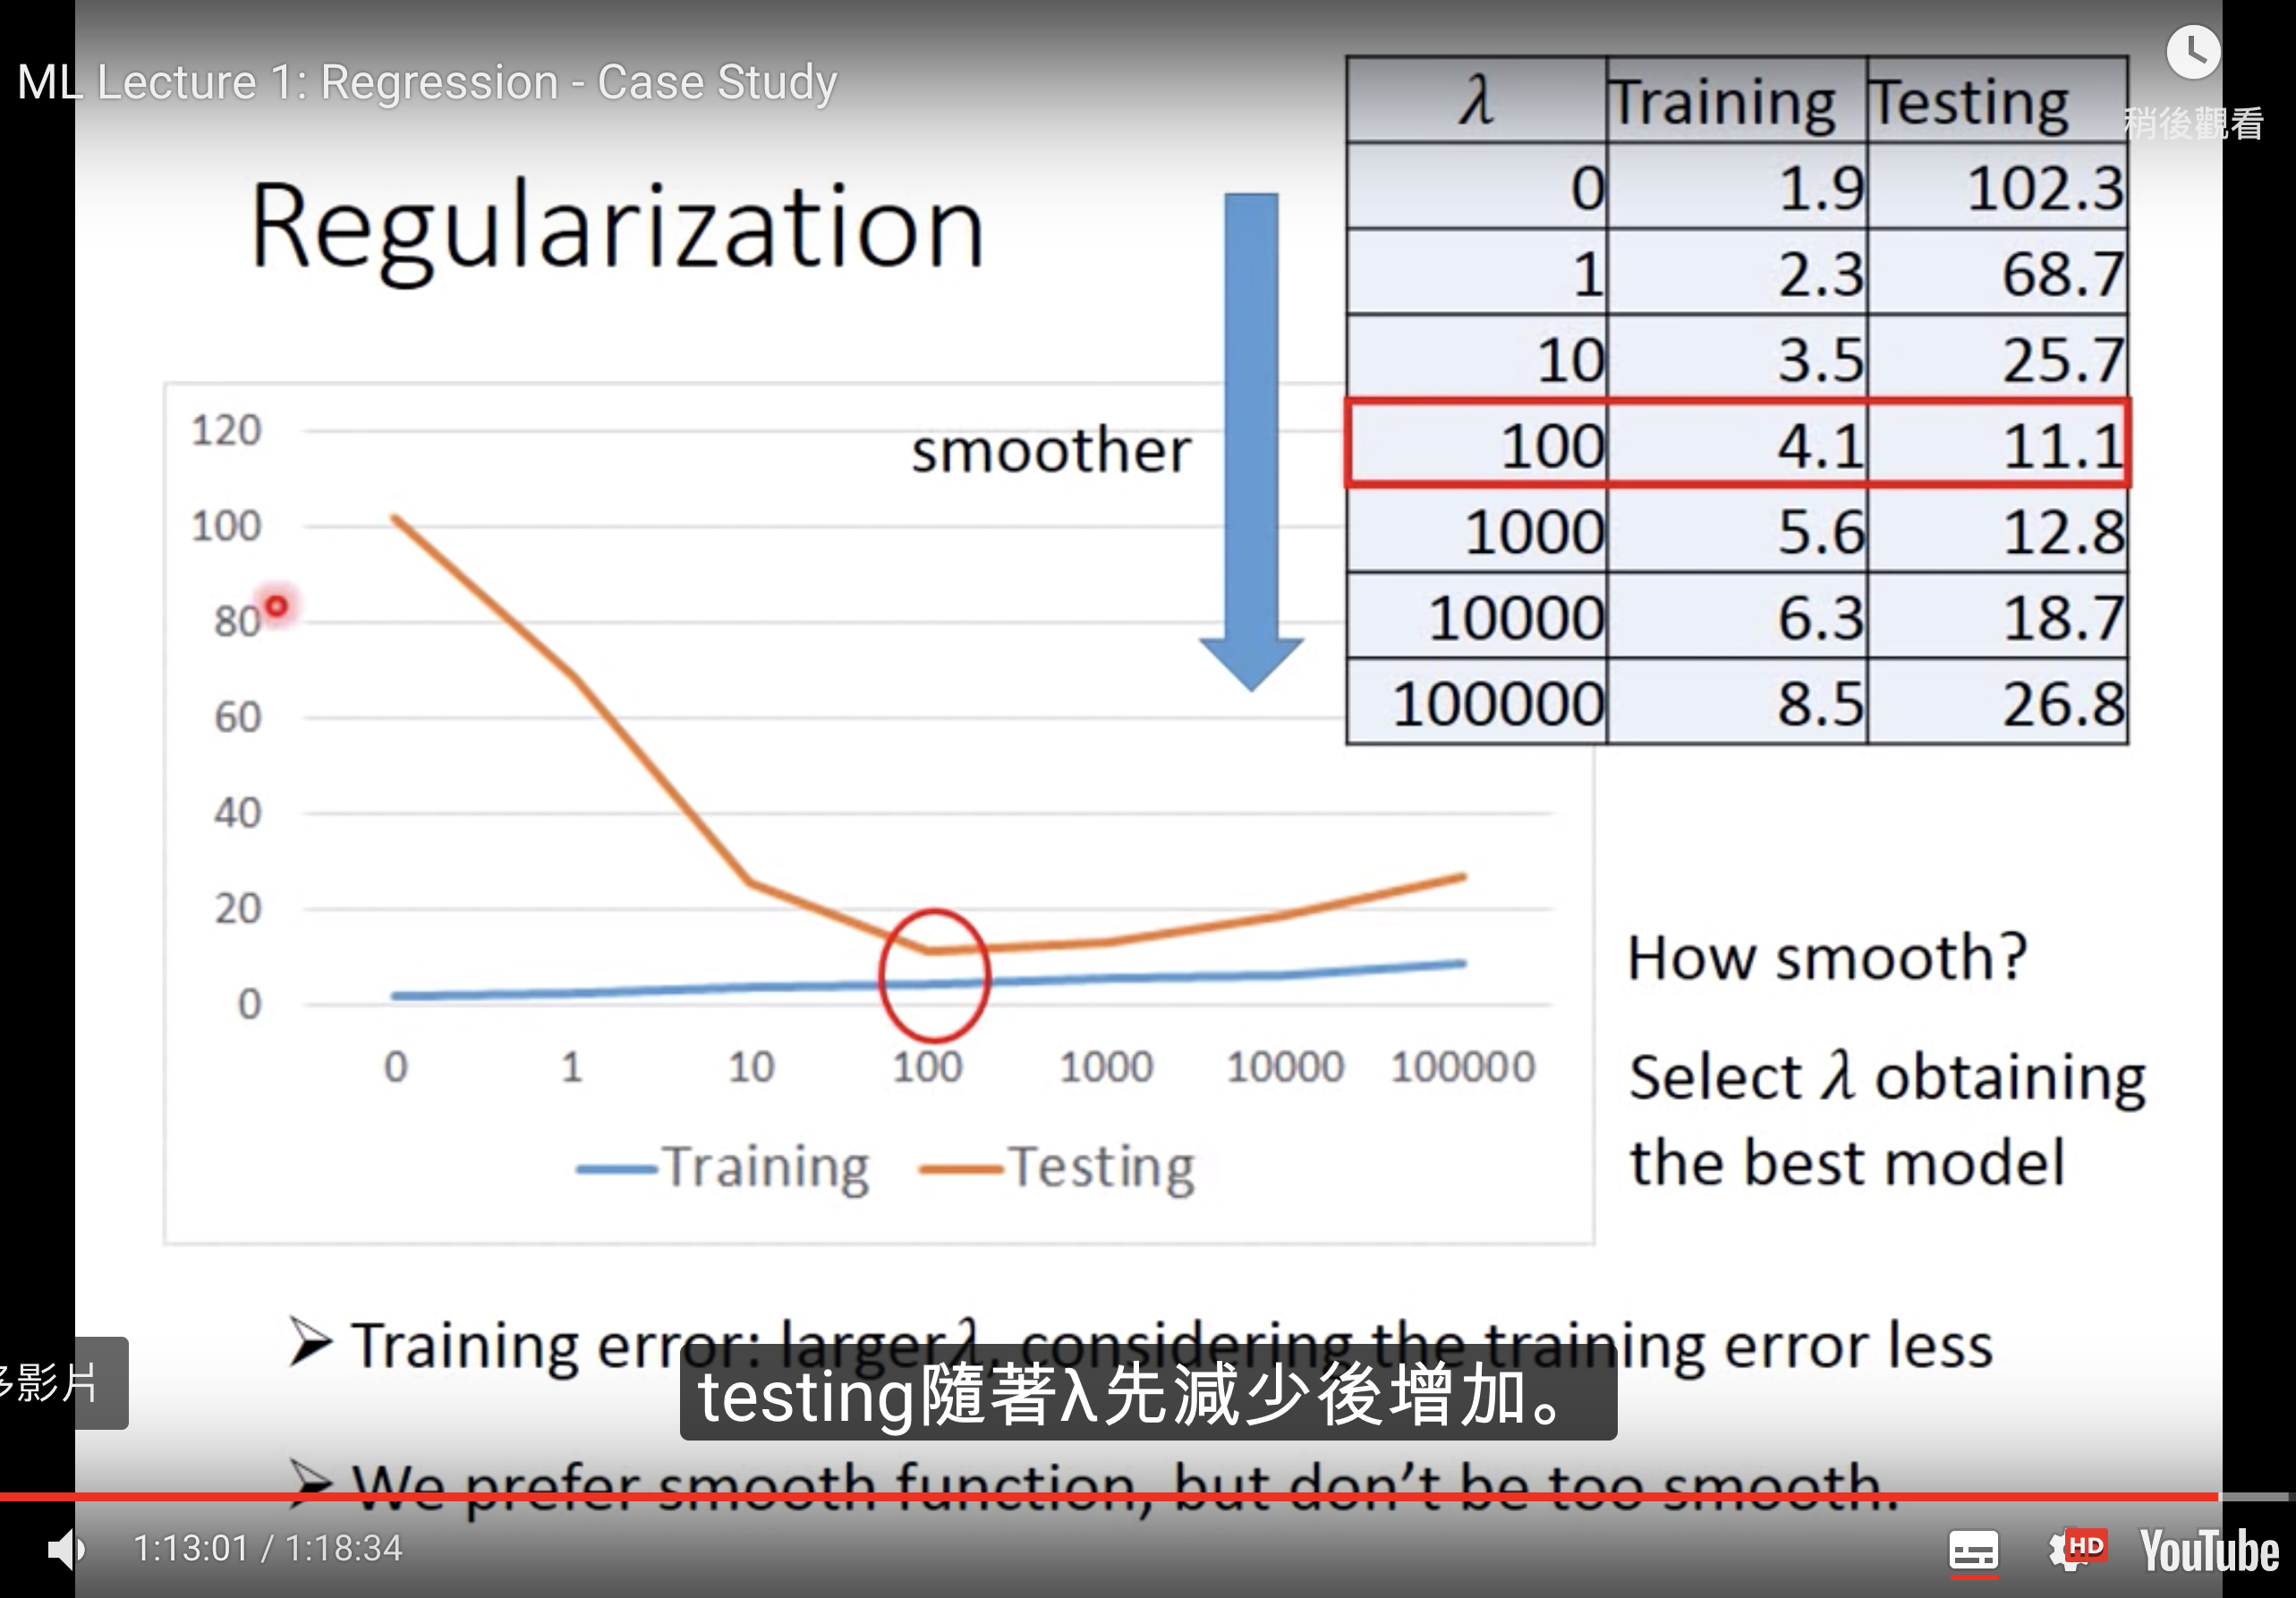

## 參考資料

理解機器學習中很重要的 Bias/Variance trade-off 的意義為何

影片連結：[學習曲線與 bias/variance trade-off](http://bangqu.com/yjB839.html)

![img](https://ai100-fileentity.cupoy.com/2nd/homework/D33/1558082859787/large)

## bias-variance 權衡（bias-variance會一高一低）

從數學上分析，我們想要得到低 bias 和低 variance 的原因是很明顯的。如上所述，bias 和 variance 只能增加模型的誤差。

但從各自的意義來看，

我們希望低 bias 來避免構建太簡單的模型，因為在大多數情況中簡單的模型在訓練集上的表現是很糟糕的．

卻又希望較低的 variance 來避免構建一個過於複雜的模型。這樣的模型幾乎能夠完美的適應訓練集中的所有數據點。
然而，訓練數據通常都包含噪聲，而且它僅僅是更大的數據中的一個小樣本。過於複雜的模型能夠捕獲這種噪聲。當在樣本外的數據上測試的時候，性能通常會很差。這是因爲模型在樣本訓練數據上學習得太極致了。它對一些東西特別瞭解，但是對於其它一無所知。

### 在實際中，我們需要接受一個 trade-off。我們不可能同時得到低 bias 和低 variance，所以我們期望得到某種中間結果。

![img](http://i1.bangqu.com/j/news/20180123/f768f0c87e3843c1bc6f841fb608bba9.png)


> ### Y=^f(X)+reducible error+irreducible error （3）

### 這告訴我們，在實際中性能最好的模型會收斂於某個不可約誤差，而不是理想的誤差值（對於 MSE，理想的誤差值是 0；我們將會看到，其他的誤差值會有和 MSE 不同的理想值）。

![img](http://i1.bangqu.com/j/news/20180123/f4e2bf6b8eb84ea1aa49945f50a130ee.png)

> ### 我們將使用 scikit-learn 中的 learning_curve() 函數來生成一個迴歸模型的學習曲線。不需要我們自己設置驗證集，learning_curve() 函數會自己完成這個任務。

在監督學習中，我們假設特徵和目標之間是有實際聯繫的，並且要用一個模型來預測這種未知關係。當假設是正確的時候，確實會存在這樣一個模型，它能夠完美地描述特徵和目標之間的關係 f。

事實上，f 總是完全未知的，我們使用一個模型 f^來估計它（請注意 f 和 f^表達上的略微不同之處）。我們使用一個確定的訓練集來得到一個確定的模型 f^。

### 如果我們使用了一個不同的訓練集，我們很可能會得到一個不同的 f^。f^隨着我們對訓練集的改變而變化的程度就叫做 variance。

---

### 模型的 bias 越低，它適應數據的能力就越強，同時 variance 也越高。所以，bias 越低，variance 越高。
![img](http://i1.bangqu.com/j/news/20180123/5bc93e9fbee64d909795afa4f52b16dd.jpeg)

### 反過來也說得通：bias 越高，variance 越低。一個高 variance 的模型構建的簡單模型通常是不能很好適應數據集的。當我們改變數據集的時候，從高 bias 的算法得到的模型 f^ 通常不會有很大不同。
![img](http://i1.bangqu.com/j/news/20180123/357b5ba39ad042aa9d1a96eed5c2e75d.png)

如果我們改變訓練集的時候 f^ 不會改變太多，那麼 variance 就比較低，這恰好證明了我們的觀點：bias 越高，variance 越低。

---

從 500 個數據點開始，驗證集的 MSE 能夠保持大致不變。這給我們一個重要信息：增加更多的訓練數據點也不會帶來更好的模型。所以與其浪費時間（金錢）來收集數據，我們更需要的是做點其他事情，例如嘗試一下能夠構建更加複雜模型的算法。

### 爲了避免誤解概念，需要注意的很重要的一點是：增加更多的訓練數據樣本確實是無濟於事的。然而，增加更多的特徵就是另外一回事了，因爲增加特徵能夠增加模型的複雜度。

![img](http://i1.bangqu.com/j/news/20180123/89edbff69a834fc6a09357730be3d37b.png)

---

### 現在我們來討論一下 bias 和 variance 的診斷。bias 問題的主要標誌是較高的驗證誤差。

### 1. bias 的診斷 ( bias 問題的主要標誌是較高的驗證誤差 )
爲了找到這個答案，我們需要注意一下訓練誤差。如果訓練誤差特別小，這就說明估計模型能夠很好地擬合訓練數據，這就是說模型在對應的數據集上有較小的 bias。

如果訓練誤差比較高，就說明估計模型不能很好地擬合訓練數據，也就意味着在對應的數據集上有較高的 bias。

![img](http://i1.bangqu.com/j/news/20180123/bfe60571bf784dd7a43c4f44c49e3b28.png)


### 2. variance 的診斷 

現在讓我們診斷一下最終的 variance 問題。對 variance 的估計可以通過以下兩種方式完成：

1. 通過檢查驗證學習曲線和訓練學習曲線之間的差距；
2. 通過檢查訓練誤差：檢查誤差的值隨着訓練樣本數增加的變化。

![img](http://i1.bangqu.com/j/news/20180123/673d0d38de7e42f3830c52de04164fd4.png)

較小的差距代表較小的 variance。通常，差距越小，variance 越小。反之亦然：差距越大，variance 越大。

正如我們之前觀察到的一樣，如果 variance 比較大，那麼說明模型過於擬合訓練數據了。當模型過擬合的時候，它在泛化到從未見過的數據上時會存在問題。當這樣一個模型分別在訓練集和驗證集上測試的時候，訓練誤差會比較低，驗證誤差通常會比較高。當我們改變訓練集大小的時候，這種模式會繼續存在，訓練集和驗證集之間的差距會決定這兩個學習曲線之間的距離。

訓練誤差和驗證誤差之間的關係，以及訓練學習曲線和驗證學習曲線之間的差距可以總結如下：

> ### gap=validation error−training error

兩個誤差之間的差距越大，曲線之間的距離越大，variance 越大。

![img](http://i1.bangqu.com/j/news/20180123/1ba88a6278914269821529f9ec94b5f7.png)

---

### 通常，以下兩種修正方式在處理 [高 bias 和 低 variance] 的問題時會比較奏效：

> 1. 用更多的特徵訓練當前的學習算法，即通過增加模型的複雜度來降低 bias。

> 2. 減少對當前算法的正則化。簡言之，正則化能夠避免算法在訓練數據上過擬合。如果我們減少了正則化，模型會更好地擬合訓練數據，所以，就會增加 variance，降低 bias。




### 處理 [高 variance 和 低 bias] 的問題：

![img](http://i1.bangqu.com/j/news/20180123/e33768472de8434db1eaf3f6fcbc63f3.png)

觀察學習曲線，我們可以發現已經成功地降低了 bias。雖然還存在很明顯的 bias，但是已經不像之前那麼大了。觀察訓練曲線我們可以判斷，這次的模型具有較低的 bias 問題。

兩條曲線之間的差距表明模型的 variance 有着大幅度的增大。較小的訓練 MSE 證實了對高 variance 的判斷。

較大的曲線差距和較低的訓練誤差同樣也標誌着過擬合問題的存在。當模型在訓練集上性能較好，而在測試集上性能很差的時候，就是過擬合問題。


![img](http://i1.bangqu.com/j/news/20180123/82ce1466b32445ba9a1243e7ae29fec5.png)

隨機森林出現了較高的 variance 和相當低的 bias，以及在訓練集上的過擬合問題。
在目前的學習算法下，增加更多的學習樣本非常有可能得到更好性能的模型。
至此，我們可以做以下的事來改善我們的模型：

(處理 [高 variance 和 低 bias] 的問題：)

> 1. 增加更多的訓練樣本

> 2. 爲目前所用的算法增加正則化。這會增加模型的 bias，降低模型的 variance。

> 3. 減少我們目前在訓練及數據中所用的特徵數。算法仍舊會很好地適應訓練集，但是由於特徵數目減少了，算法會構建相對簡單的模型。這應該能夠增加模型的 bias，降低模型的 variance。


- 增加更多的訓練樣本

- 增加特徵

- 特徵選擇

- 超參數優化